<font size=6><b> Lec03. 딥러닝 기초(이미지)

* ref : https://www.tensorflow.org/?hl=ko
* ref : https://keras.io/ko/
* ref : https://keras.io/api/layers/core_layers/dense/

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(1234)

# Data Load

In [3]:
from keras.datasets import mnist

In [4]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
y_train[:1], X_train[:1].shape, X_train[:1]

(array([5], dtype=uint8),
 (1, 28, 28),
 array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            3,  18,  18,  18, 126, 

# EDA
* imshow : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

<pre>
* <font color=blue>Z = 픽셀값을 갖는 행렬
  plt.imshow(Z)
  plt.show()

## mnist 

In [6]:
len(X_train[:1])     # [ [[  0,..,28], 
                     #    [  0,..,28],
                     #   ],
                     # ]   

1

In [7]:
len(X_train[0] )     #  [[  0,..,28], 
                     #   [  0,..,28],
                     #  ]

28

In [8]:
len(X_train[0][0] )  #   [  0,..,28]

28

In [9]:
X_train[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,
           0,   0,   0

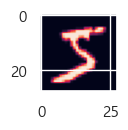

In [10]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[:1][0])
plt.show()

range(0, 30)


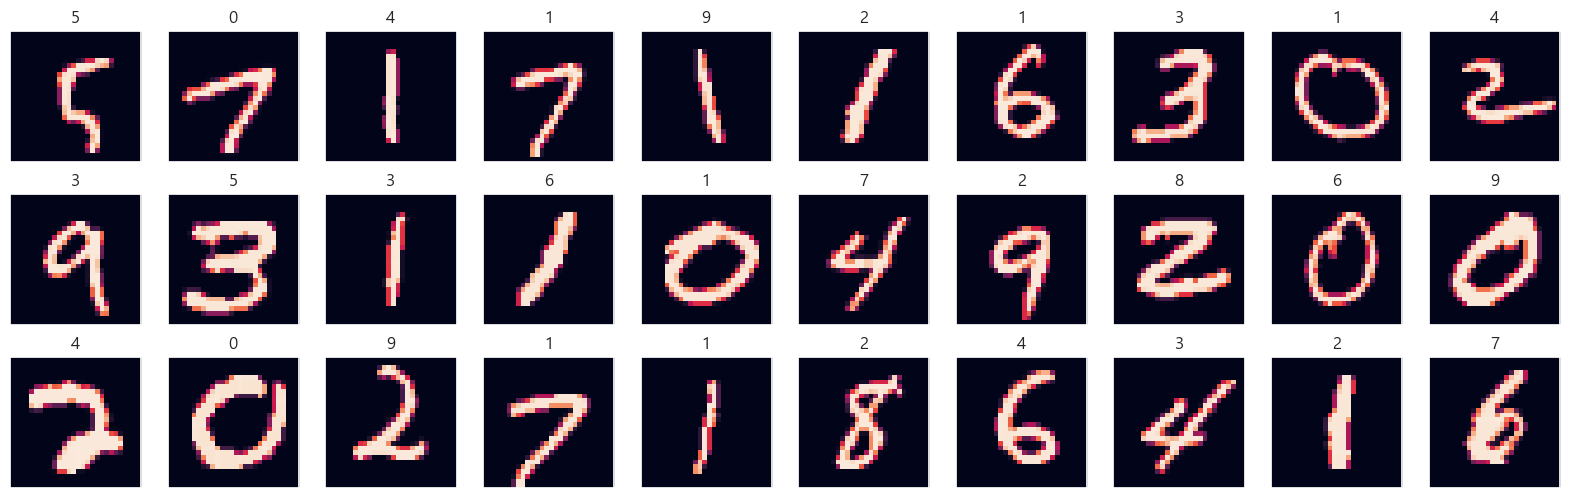

In [11]:
fig, axes = plt.subplots(3,10, figsize=(20,6))
print(range(X_train[:30].shape[0]))
for i, px_arr in enumerate(X_train[100:130]) : 
    row = i // 10
    col = i % 10
    axes[row][col].imshow(px_arr)
    axes[row][col].set_title(y_train[i])
    # Hide axes,grid
    axes[row][col].grid(False)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])
plt.show()

## target 분포도

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64


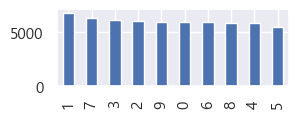

In [12]:
print( pd.Series(y_train).value_counts() )
plt.figure(figsize=(3,1))
pd.Series(y_train).value_counts().plot(kind='bar')
plt.show()

## mnist : 숫자N 이미지

Int64Index([4, 19, 22, 33, 43, 45, 48, 54, 57, 80], dtype='int64')


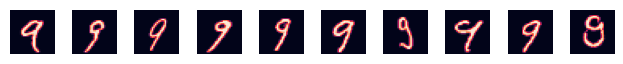

In [13]:
s = pd.Series(y_train)
idx_list =  s[s.values == 9].index[:10] 
print(idx_list)

for i, px_arr in enumerate(X_train[idx_list]):
    plt.subplot(3,10, i+1)
    plt.imshow(px_arr)
    plt.axis('off')
    plt.grid(False)
plt.tight_layout()
plt.show()


In [14]:
s = pd.Series(y_train)
idx_list = []
for N in range(10) :
    idx_list.extend( s[s.values==N].index[:10] )
print( len(idx_list) , idx_list )

100 [1, 21, 34, 37, 51, 56, 63, 68, 69, 75, 3, 6, 8, 14, 23, 24, 40, 59, 67, 70, 5, 16, 25, 28, 76, 82, 109, 117, 120, 122, 7, 10, 12, 27, 30, 44, 49, 50, 74, 86, 2, 9, 20, 26, 53, 58, 60, 61, 64, 89, 0, 11, 35, 47, 65, 100, 132, 138, 145, 173, 13, 18, 32, 36, 39, 62, 66, 73, 83, 90, 15, 29, 38, 42, 52, 71, 79, 84, 91, 96, 17, 31, 41, 46, 55, 85, 94, 97, 125, 137, 4, 19, 22, 33, 43, 45, 48, 54, 57, 80]


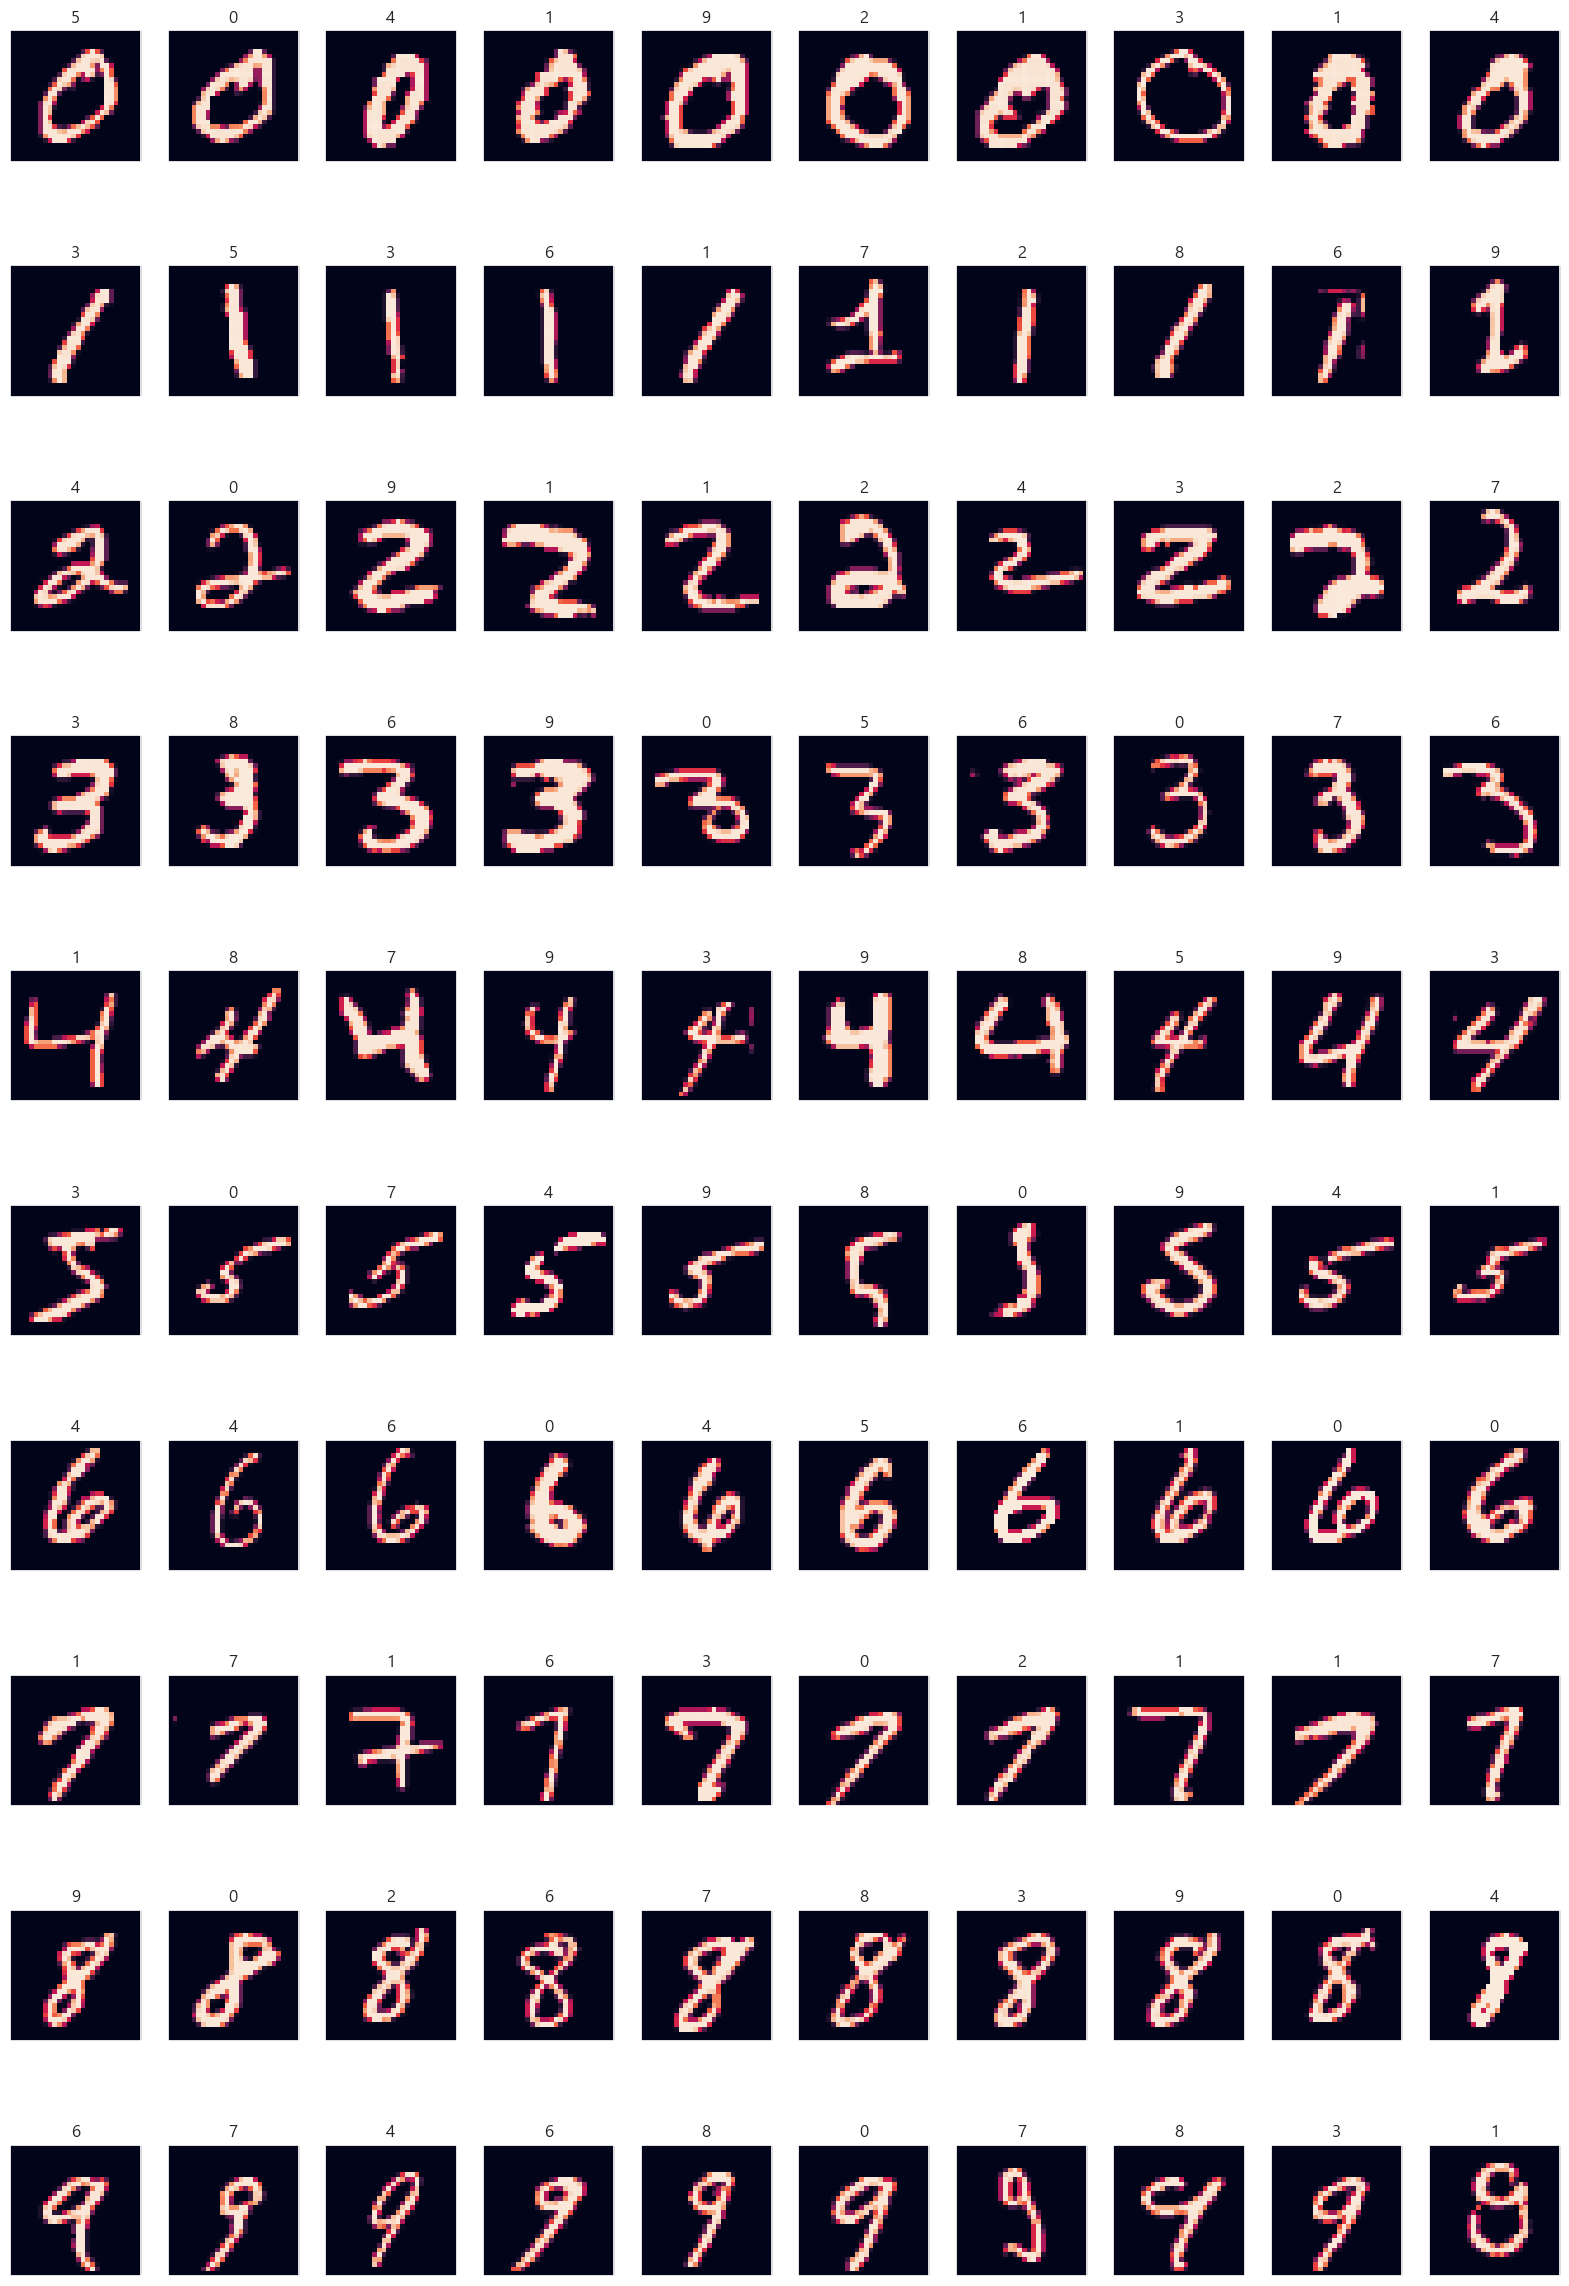

In [15]:
fig, axes = plt.subplots(10,10, figsize=(20,30))
# for i, px_arr in enumerate(X_train[100:130]) :     
for i, px_arr in enumerate(X_train[idx_list]) :
    row = i // 10
    col = i % 10
    axes[row][col].imshow(px_arr)
    axes[row][col].set_title(y_train[i])
    # Hide axes,grid
    axes[row][col].grid(False)
    axes[row][col].set_xticks([])
    axes[row][col].set_yticks([])
plt.show()


# 전처리 & 가공

## Flatten
* 이미지 픽셀 (28*28) : 행렬(2D) --> arr(1D)

### 1장

In [16]:
X_train[0].shape  #[[

(28, 28)

In [17]:
# new_arr = X_train[0].reshape(-1)  # [ 
# new_arr.shape

X_train[0].reshape(-1).shape  # [ 

(784,)

In [18]:
X_train[0].flatten().shape

(784,)

### 60000만장

In [19]:
X_train.shape 

(60000, 28, 28)

In [20]:
X_train.reshape(60000, 784).shape

(60000, 784)

In [21]:
X_train.reshape(60000, -1).shape

(60000, 784)

In [22]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)


## 정규화(픽셀값 스케일링)
* 0 ~ 255 픽셀값을 0 ~1 값으로 변경
* MinMaxScaler()

In [23]:
X_train_scaler = X_train / 255.0
X_test_scaler  = X_test / 255.0

## traget 더미화 
* sklearn : OneHotEncoder(), pd.get_dummies()
* keras : utils.to_categorical()
* 0 ~ 9 숫자 : 원핫인코딩 
    * 0 : 1000000000
    * 1 : 0100000000 

In [24]:
from keras.utils import to_categorical
y_train_oh = to_categorical(y_train, num_classes=10, dtype='int')
y_test_oh  = to_categorical(y_test , num_classes=10, dtype='int')

print(y_train[:5])
print(y_train_oh[:5])

[5 0 4 1 9]
[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


# 모델 (Neural Network, FC)

## 모델&학습

In [25]:
from keras.layers import Dense
from keras import Sequential
from keras.initializers import GlorotNormal  #Xavier

In [26]:
model = Sequential()
model.add(Dense(units=300, input_dim=28*28, activation='relu', kernel_initializer='glorot_normal')) #입력층
model.add(Dense(units=100,  activation='relu'))              #히든레이어
model.add(Dense(units=60,  activation='relu'))              #히든레이어
model.add(Dense(units=10,  activation='softmax'))           #3종 출력층
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [27]:
fit_hisroty = model.fit(X_train_scaler, y_train_oh
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_scaler, y_test_oh)  )

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.3012 - accuracy: 0.9102 - val_loss: 0.1528 - val_accuracy: 0.9554
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1144 - accuracy: 0.9658 - val_loss: 0.0984 - val_accuracy: 0.9697
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0741 - accuracy: 0.9772 - val_loss: 0.1013 - val_accuracy: 0.9712
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0539 - accuracy: 0.9831 - val_loss: 0.0888 - val_accuracy: 0.9724
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0815 - val_accuracy: 0.9772
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0924 - val_accuracy: 0.9749
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0941 - val_accuracy: 0.9762
Epoch 

## 평가 시각화

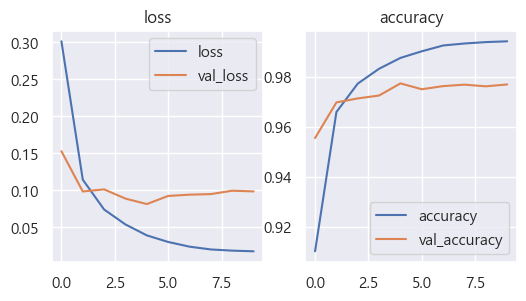

In [28]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# 예측

## 예측

In [30]:
proba = model.predict(X_test_scaler)
proba[:3]

313/313 [==============================] - 0s 2ms/step


array([[5.7070582e-07, 9.1711627e-07, 8.2998604e-06, 5.4161339e-03,
        3.0259945e-10, 1.1011558e-06, 2.0124831e-12, 9.9268579e-01,
        1.9973347e-06, 1.8851496e-03],
       [3.2811350e-17, 1.6879366e-10, 1.0000000e+00, 7.1757688e-13,
        1.9383848e-20, 8.2249199e-18, 2.9844677e-16, 6.3809724e-16,
        7.8049602e-16, 2.1648158e-22],
       [6.7354620e-08, 9.9988341e-01, 4.6751276e-05, 1.4056542e-07,
        4.5259700e-08, 9.4768616e-08, 9.5066832e-07, 6.0083490e-05,
        8.4784451e-06, 2.9186126e-10]], dtype=float32)

In [32]:
pred   = np.argmax(proba, axis=1)
y_test = np.argmax(y_test_oh, axis=1)
print(pred[:3], y_test[:3])

[7 2 1] [7 2 1]


## 오답 검증
* sklearn.metrics.<b>confusion_matrix()</b>
* pandas.<b>crosstab(index, columns, values=None, rownames=None, colnames=None</b>, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)


In [37]:
ans_df = pd.DataFrame( {"y_test": y_test, "pred":pred})
ans_df.head()

,y_test,pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [35]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, pred)
print(res)

[[ 969    0    2    0    0    1    6    1    1    0]
 [   0 1130    1    1    0    0    2    0    1    0]
 [   3    1 1015    3    1    0    0    3    6    0]
 [   0    0    7  998    0    3    0    1    1    0]
 [   1    3    4    1  959    0    4    1    1    8]
 [   2    0    0   11    0  868    6    0    4    1]
 [   4    1    2    1    2    4  942    0    2    0]
 [   2    4   13   11    1    0    0  987    2    8]
 [   2    0    4   11    2    0    0    1  952    2]
 [   2    6    0   10    7    2    1    2    3  976]]


In [39]:
pd.crosstab(index=y_test, columns=pred,  rownames=['True'], colnames=['Pred'])

Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,969,0,2,0,0,1,6,1,1,0
1,0,1130,1,1,0,0,2,0,1,0
2,3,1,1015,3,1,0,0,3,6,0
3,0,0,7,998,0,3,0,1,1,0
4,1,3,4,1,959,0,4,1,1,8
5,2,0,0,11,0,868,6,0,4,1
6,4,1,2,1,2,4,942,0,2,0
7,2,4,13,11,1,0,0,987,2,8
8,2,0,4,11,2,0,0,1,952,2


In [48]:
## 오답 idx
idx_list = ans_df[ ans_df['y_test'] != ans_df['pred']  ].index
len(idx_list)

204

In [49]:
pd.Series(y_test[idx_list]).value_counts()

7    41
9    33
5    24
4    23
8    22
2    17
6    16
3    12
0    11
1     5
dtype: int64

* by 형진

In [57]:
xdf = ans_df[ans_df['pred']!= ans_df['y_test']]
xdf = xdf.sort_values(by='y_test')
xdf.head()

,y_test,pred
4065,0,2
8325,0,6
8243,0,6
717,0,6
4880,0,8


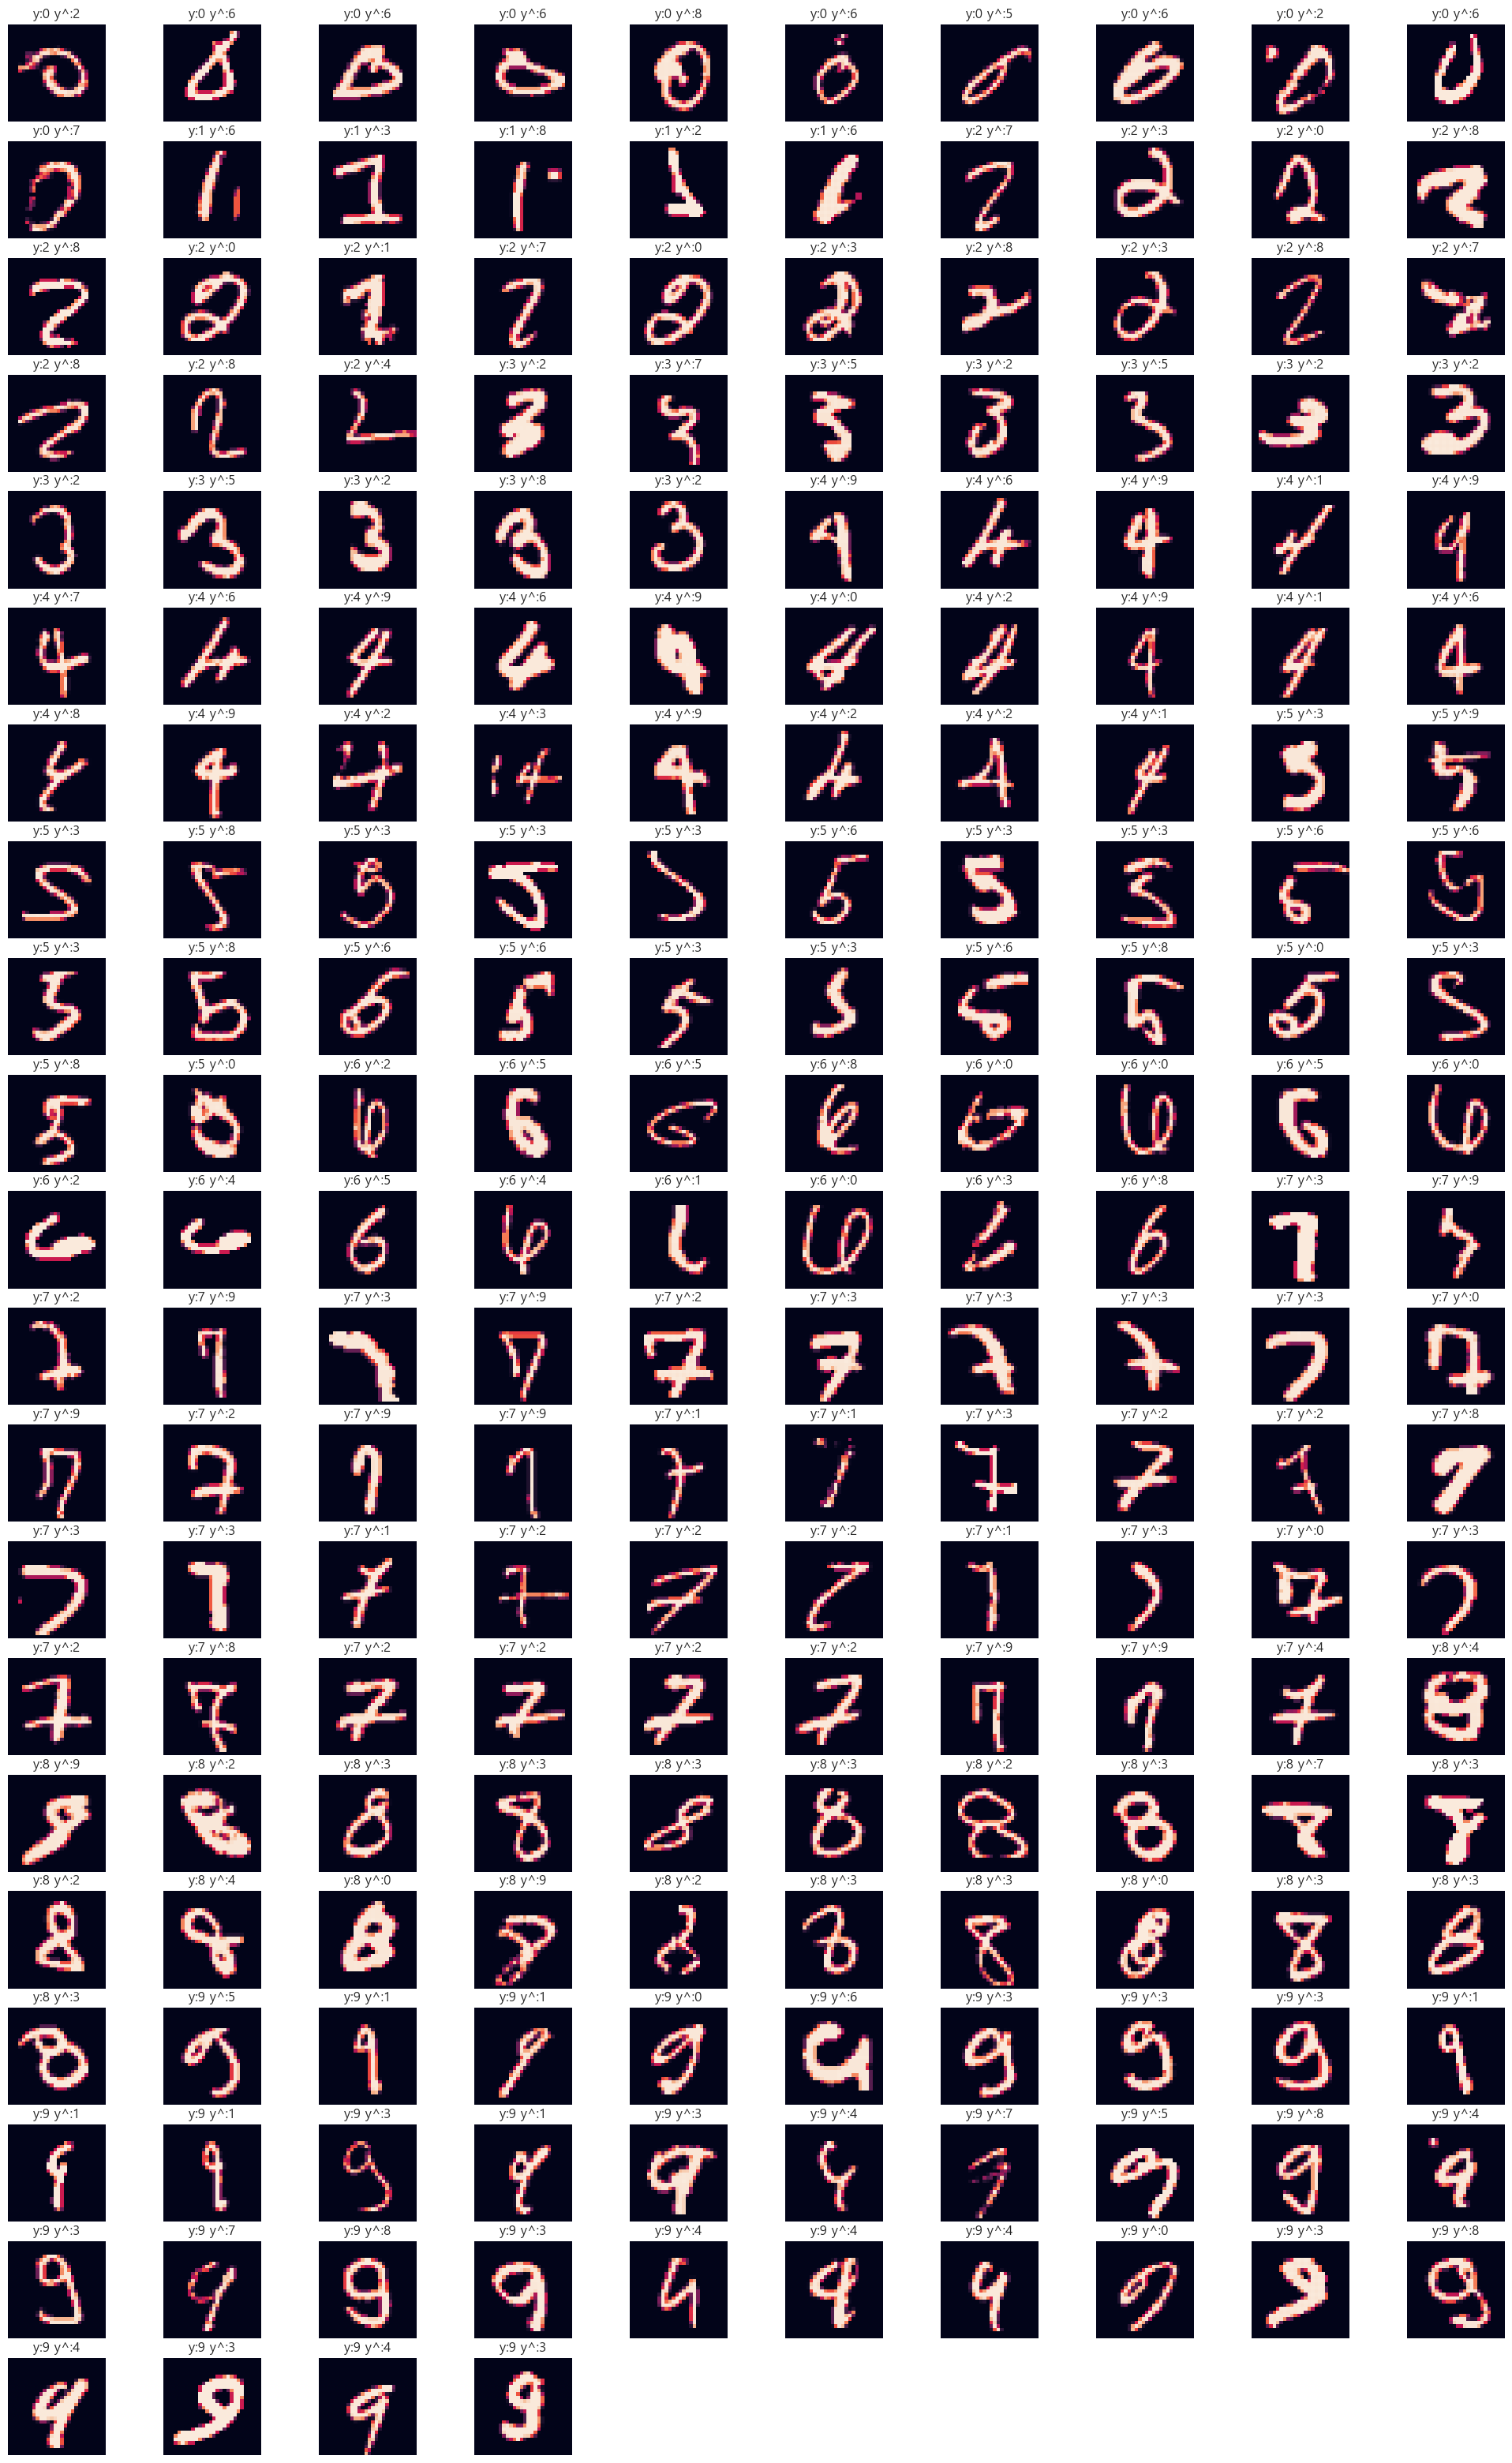

In [63]:
plt.figure(figsize=(25,40))

for i, idx in enumerate(xdf.index):
    plt.subplot(21,10,i+1)
    plt.title(f"y:{xdf.loc[idx, 'y_test']} y^:{xdf.loc[idx, 'pred']}")
    plt.imshow(X_test[idx].reshape(28,28))
    plt.axis('off')
    plt.grid(False)
    
# plt.tight_layout()    
plt.show()

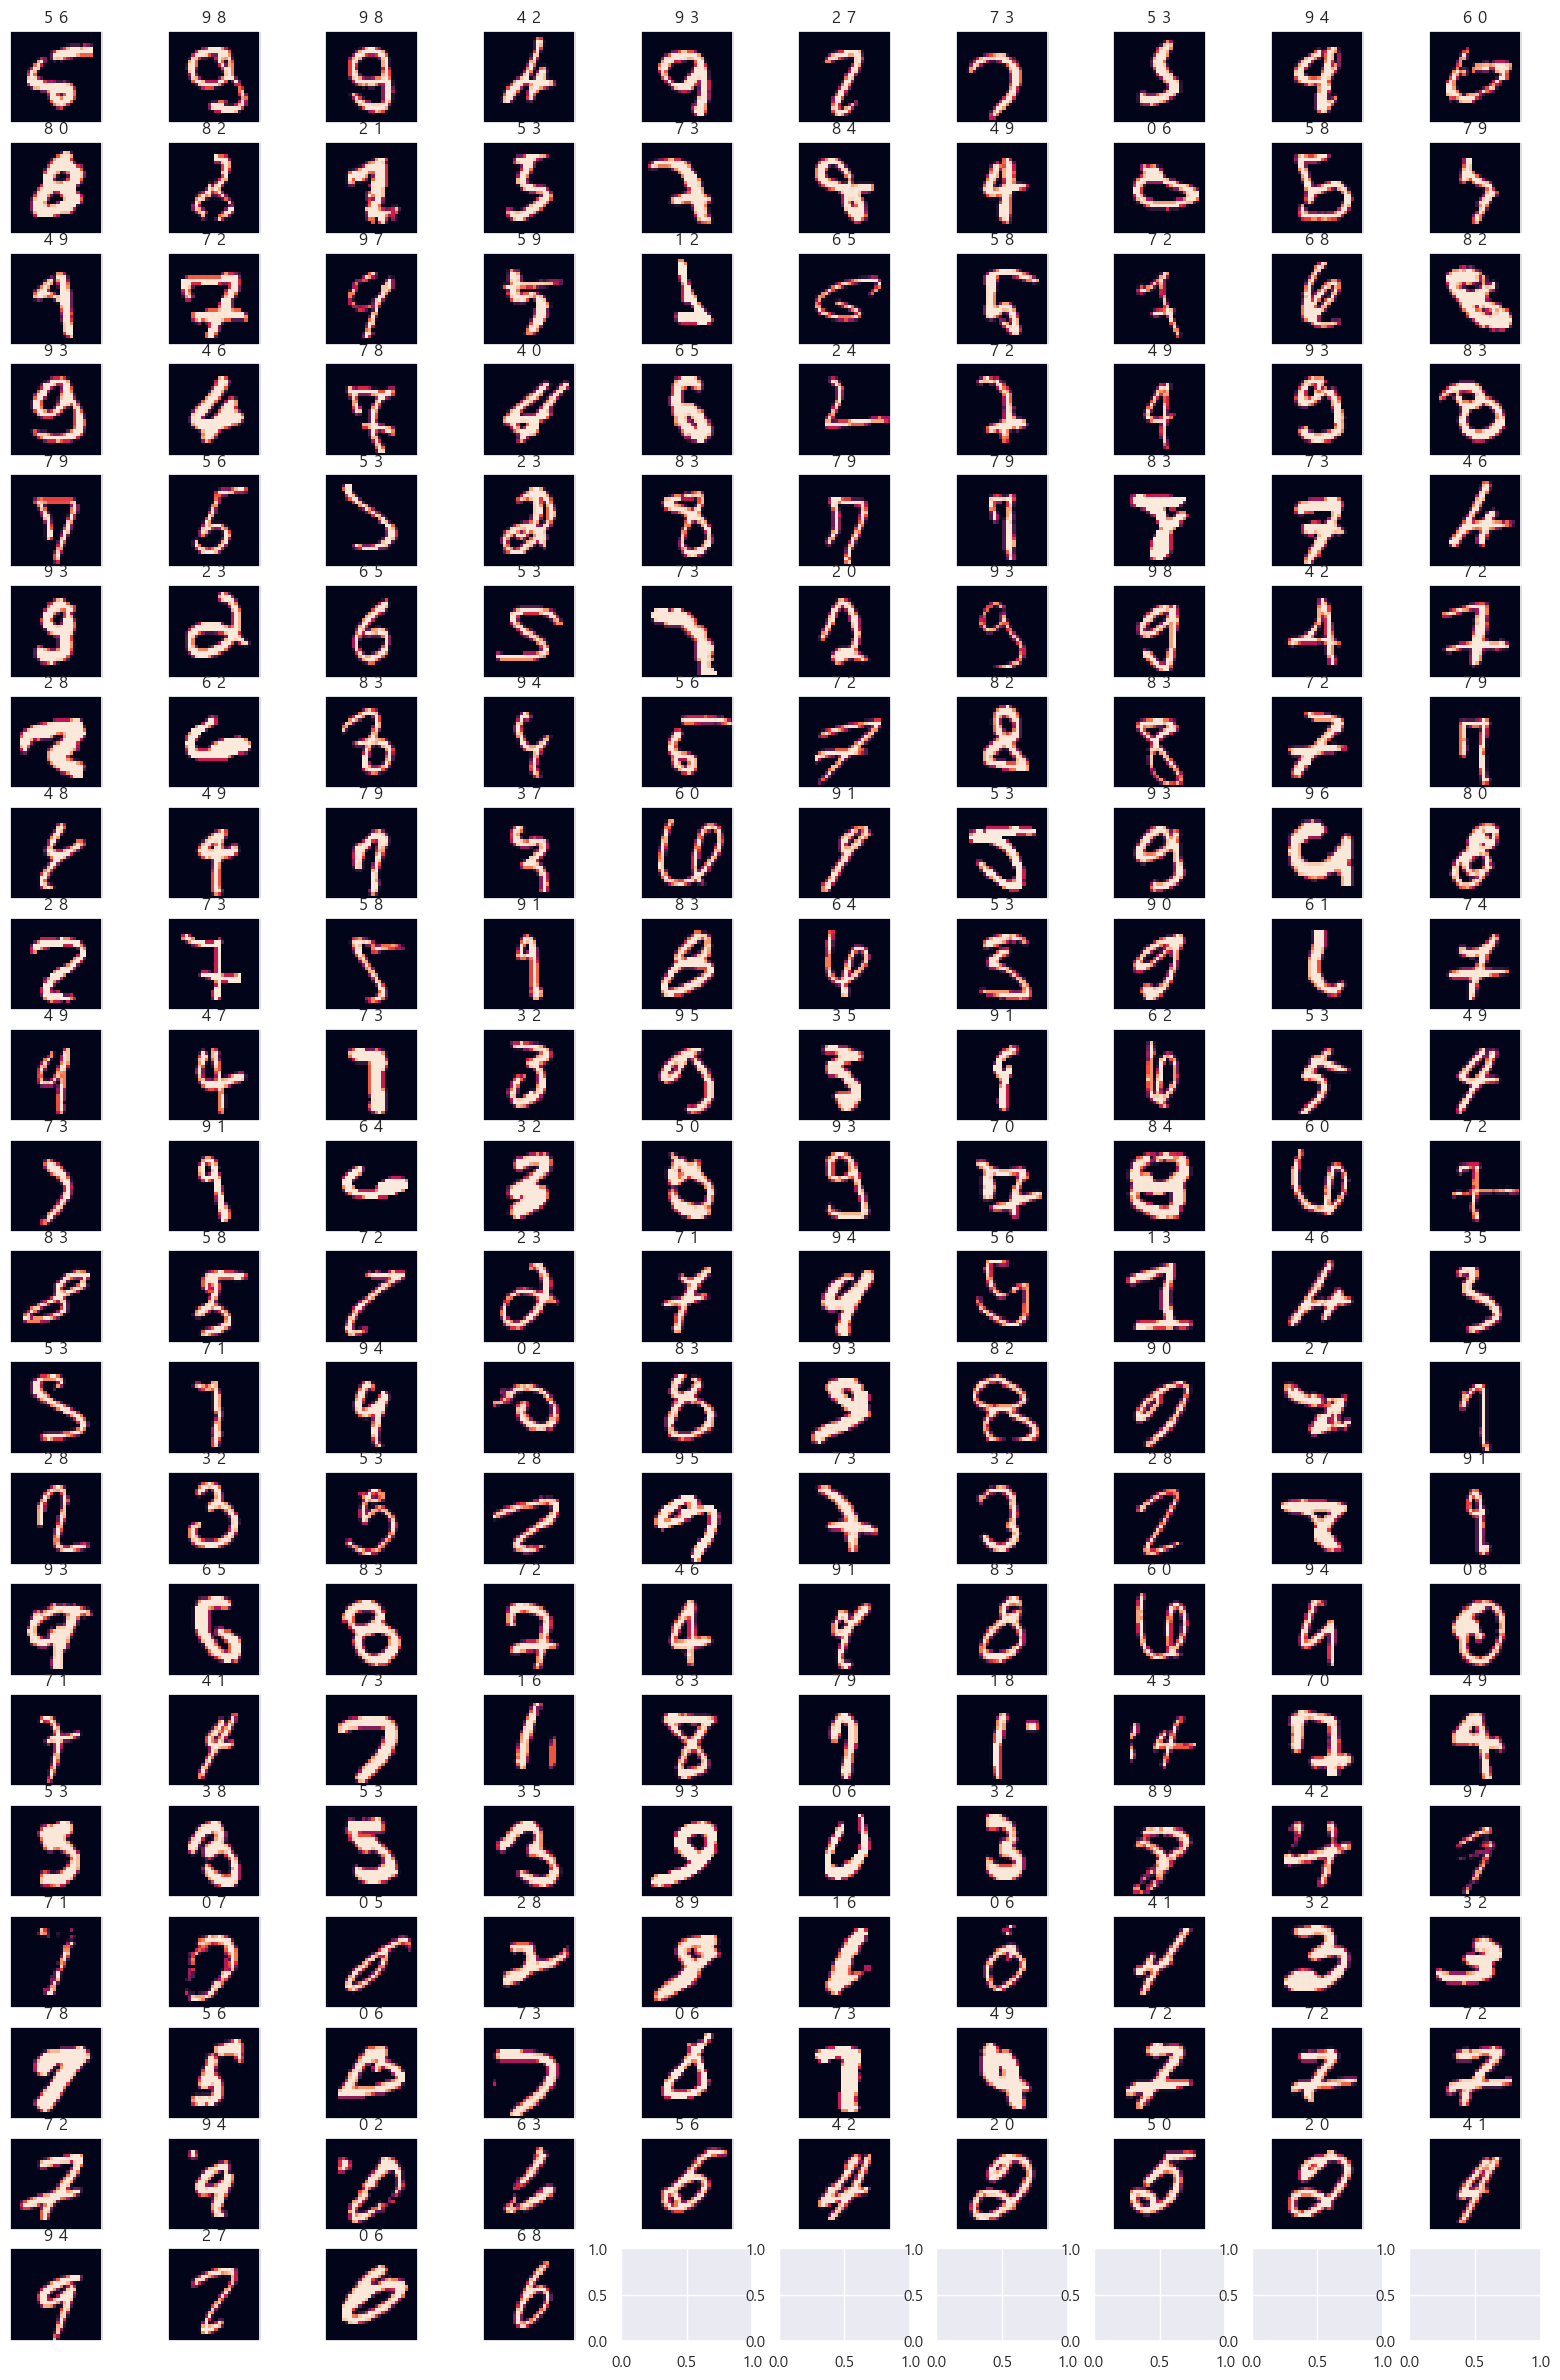

In [54]:
# fig, axes = plt.subplots(21,10, figsize=(20,30))
# for i, idx in enumerate(idx_list) :     
#     row = i // 10
#     col = i % 10
#     axes[row][col].imshow(X_test[idx].reshape(28,28))
#     axes[row][col].set_title(f"{ans_df.loc[idx,'y_test']} {ans_df.loc[idx,'pred']}" )
#     # Hide axes,grid
#     axes[row][col].grid(False)
#     axes[row][col].set_xticks([])
#     axes[row][col].set_yticks([])
# plt.show()

# 사용자 데이터 예측
* Jupyter Web Widget : https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

In [65]:
# ! pip install ipywidgets

In [136]:
import ipywidgets as widgets
btn = widgets.FileUpload(
    accept='image/*',    #'.png', 'image/*,.pdf'
    multiple=True
)
display(btn)

FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

In [137]:
btn.value

({'name': 'test_3.png',
  'type': 'image/png',
  'size': 407,
  'content': <memory at 0x0000024B898EE4C0>,
  'last_modified': datetime.datetime(2023, 4, 12, 5, 47, 58, 581000, tzinfo=datetime.timezone.utc)},
 {'name': 'test_5.png',
  'type': 'image/png',
  'size': 419,
  'content': <memory at 0x0000024B898EE940>,
  'last_modified': datetime.datetime(2023, 4, 12, 5, 48, 18, 589000, tzinfo=datetime.timezone.utc)})

* by 규환

In [138]:
for dic in btn.value:
    display(widgets.Image(value=dic['content'].tobytes()))

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00/\x00\x00\x006\x08\x02\x00\x00\x00\xd8\x9cW\xa8\x…

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00/\x00\x00\x006\x08\x02\x00\x00\x00\xd8\x9cW\xa8\x…

test_3.png  407
(1, 784)
1/1 [==============================] - 0s 27ms/step
2
test_5.png  419
(1, 784)
1/1 [==============================] - 0s 21ms/step
5


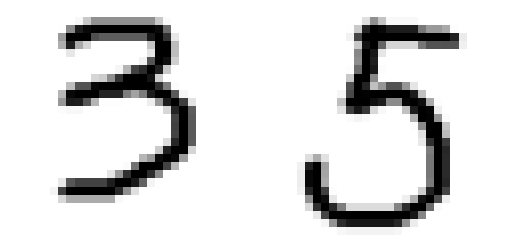

In [158]:
from PIL import Image
import io
for i, dic in enumerate(btn.value):
    plt.subplot(1, len(btn.value)  , i+1)   #1 2 1   1 2 2
    print(f"{dic['name']}  {dic['size']}")
    
    # ------------------------------------------------
    # addr   = dic['content']
    # io_obj = io.BytesIO(addr)   # io.BytesIO(  dic['content']  )
    # bbyte  = addr.tobytes()     # dic['content'].tobytes()
    # print(addr, io_obj, bbyte)
    # display(    widgets.Image(value=dic['content'].tobytes())    )
    # ------------------------------------------------
    
    img = Image.open(io.BytesIO(dic['content'])).resize((28, 28)) 
    plt.axis('off')
    plt.grid(False)
    plt.imshow(img)

    # ---- train     : (60000 , 28, 28)    
    # ---- input_dim : (1, 784)
    #print(np.array(img).shape)       #  (28,28,3)
    
    img = np.array(img)[:, :, 1]
    #print( img.shape )               #  (28,28)   차원축소(컬러맵불필요)
    
    
    #img[np.newaxis, ... ]            # (1, 28,28) 사진1장  
    #np.expand_dims(img,0)
    img = (np.expand_dims(img,0)).reshape(1,-1) # (1, 784) (사진1장,픽셀1D)
    print(img.shape) 
    
    # img_scaler = img/255.0
    img_scaler = (255 - img) / 255.0           #----- 흑백반전 : by 규환
    
    proba = model.predict(img_scaler)
    print(np.argmax(proba))

# [실습] fashion_mnist

In [159]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


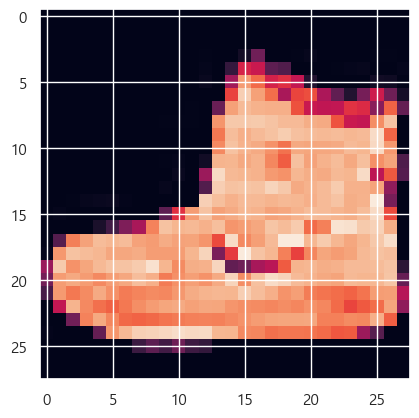

In [164]:
plt.imshow(train_images[0])
plt.show()